In [2]:
import hls4ml


2024-04-08 11:46:31.349226: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 11:46:34.383612: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 11:46:34.386526: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 11:46:43.545249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras.models import load_model

In [3]:
model=load_model('/home/rajagopal/Downloads/lightweight_mnist_model.h5')

In [4]:
config = hls4ml.utils.config_from_keras_model(model, granularity='name')


Interpreting Sequential
Topology:
Layer name: flatten_1_input, layer type: InputLayer, input shapes: [[None, 28, 28]], output shape: [None, 28, 28]
Layer name: flatten_1, layer type: Reshape, input shapes: [[None, 28, 28]], output shape: [None, 784]
Layer name: dense_2, layer type: Dense, input shapes: [[None, 784]], output shape: [None, 10]


In [5]:
print("-----------------------------------")
print("Configuration")
# plotting.print_dict(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(
    model, hls_config=config, output_dir='/home/rajagopal/small_mnist' , part='xc7a200tfbg676-2'
)

-----------------------------------
Configuration
-----------------------------------
Interpreting Sequential
Topology:
Layer name: flatten_1_input, layer type: InputLayer, input shapes: [[None, 28, 28]], output shape: [None, 28, 28]
Layer name: flatten_1, layer type: Reshape, input shapes: [[None, 28, 28]], output shape: [None, 784]
Layer name: dense_2, layer type: Dense, input shapes: [[None, 784]], output shape: [None, 10]
Creating HLS model


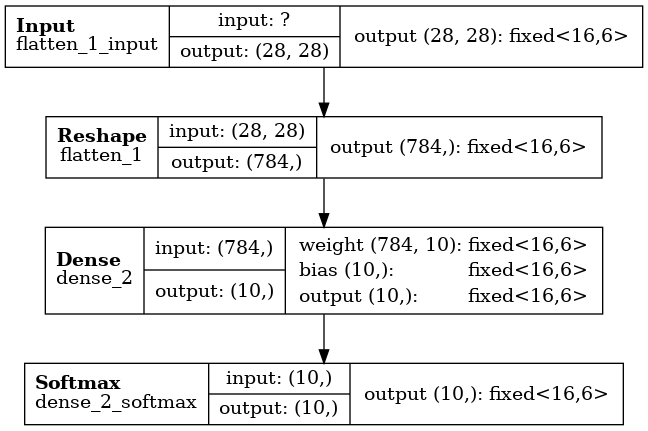

In [6]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)


In [7]:
hls_model.write()


Writing HLS project


/home/rajagopal/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Done


In [9]:
import os
os.environ['PATH']='/home/rajagopal/Vivado/2018.2/bin:'+os.environ['PATH']


In [12]:
hls_model.compile()

Writing HLS project
Done


In [ ]:
# Use Vivado HLS to synthesize the model
# This might take several minutes
hls_model.build(csim=False)



****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2018.2 (64-bit)
  **** SW Build 2258646 on Thu Jun 14 20:02:38 MDT 2018
  **** IP Build 2256618 on Thu Jun 14 22:10:49 MDT 2018
    ** Copyright 1986-2018 Xilinx, Inc. All Rights Reserved.

source /home/rajagopal/Vivado/2018.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/home/rajagopal/Vivado/2018.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'rajagopal' on host 'rajagopal-HP-ProDesk-600-G4-PCI-MT' (Linux_x86_64 version 6.2.0-26-generic) on Sun Apr 07 18:16:07 IST 2024
INFO: [HLS 200-10] On os Ubuntu 22.04.4 LTS
INFO: [HLS 200-10] In directory '/home/rajagopal/small_mnist'
INFO: [HLS 200-10] Opening project '/home/rajagopal/small_mnist/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'firmware/weights' to the project

In [3]:
# Print out the report if you want
hls4ml.report.read_vivado_report('/home/rajagopal/small_mnist')

Found 1 solution(s) in /home/rajagopal/small_mnist/myproject_prj.
Reports for solution "solution1":

C SIMULATION RESULT:
INFO: [SIM 2] *************** CSIM start ***************
INFO: [SIM 4] CSIM will launch GCC as the compiler.
   Compiling ../../../../firmware/myproject.cpp in debug mode
   Generating csim.exe
INFO: Unable to open input/predictions file, using default input.
0.0556641 0.182617 0.0712891 0.0556641 0.103516 0.25 0.0585938 0.133789 0.0292969 0.0673828 
INFO: Saved inference results to file: tb_data/csim_results.log
INFO: [SIM 1] CSim done with 0 errors.
INFO: [SIM 3] *************** CSIM finish ***************

SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Mon Apr  8 01:06:51 2024

* Version:        2018.2 (Build 2258646 on Thu Jun 14 20:25:20 MDT 2018)
* Project:        myproject_prj
* Solution:       solution1
* Product family: artix7
* Target device:  xc7a200tfbg676-2


== Performance Estimates
+ Timing (ns): 
    * Summary: 
    +-------